Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2504 - accuracy: 0.9253
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1010 - accuracy: 0.9686
Epoch 3/3
313/313 [==============================] - 0s 883us/step - loss: 0.0844 - accuracy: 0.9742
TOTAL ACCURACY  -> 0.9742000102996826
TOTAL LOSS   -> 0.08436940610408783
INFO:tensorflow:Assets written to: digits.model\assets
This number below is most likely  7


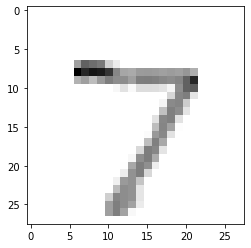

In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# Import dataset called mnist, which includes handwritten digits from 0 to 9
mnist = tf.keras.datasets.mnist

# Split mnist dataset into training & testing
(xtrain,ytrain),(xtest, ytest) = mnist.load_data()

# Scaling down the data allows for easier learning for the network
xtrain = tf.keras.utils.normalize(xtrain,axis=1)
xtest = tf.keras.utils.normalize(xtest,axis=1)

# Create the model
model = tf.keras.models.Sequential()

# 28x28 pixels are flattened, that is; 784 neurons in total
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

# Using the ReLu activation function that will return a value between 0 and 1
model.add(tf.keras.layers.Dense(units=160,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=160,activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model is trained
model.fit(xtrain,ytrain,epochs=3)

# Evaluate data which has run out of sample 
loss, accuracy = model.evaluate(xtest,ytest)
print("TOTAL ACCURACY  ->", accuracy)

# Loss is the calculated degree for errors
print("TOTAL LOSS   ->", loss)

model.save('digits.model')

# Makes a prediction (.predict must take in a list)
predictions = model.predict([xtest])
print("This number below is most likely ", np.argmax(predictions[0]))

# Show the handwritten digit
plt.imshow(xtest[0],cmap=plt.cm.binary)
plt.show()

